# Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import calendar
import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, classification_report

Questions
Most active days of the week?
Percentage of days with achoeved goals
categorize

# Data Loading

In [2]:
# Load the CSV file (update the path if needed)
data = pd.read_csv('Screen_time_and_Steps.csv')
sentiments = pd.read_csv('sentiments.csv')


# Data Preprocessing

In [3]:
# Convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

# Convert 'Screen_time' from time format to total hours
data['Screen_time'] = pd.to_timedelta(data['Screen_time']).dt.total_seconds() / 3600  # Convert seconds to hours

# Remove commas from 'Steps' and convert to float
data['Steps'] = data['Steps'].str.replace(',', '').astype(float)

# Data Exploration

In [4]:
data

,Date,Screen_time,Steps
0,2024-01-14,14.016667,43.0
1,2024-01-15,6.916667,108.0
2,2024-01-16,6.600000,2345.0
3,2024-01-17,4.966667,207.0
4,2024-01-18,9.233333,4030.0
...,...,...,...
348,2024-12-27,0.466667,8975.0
349,2024-12-28,5.133333,5435.0
350,2024-12-29,6.666667,3758.0
351,2024-12-30,1.200000,13002.0


In [5]:
data.describe()

,Screen_time,Steps
count,349.000000,353.000000
mean,7.431996,5648.736544
std,3.712615,4517.565156
min,0.466667,0.000000
25%,4.266667,1638.000000
50%,7.350000,5055.000000
75%,10.133333,8764.000000
max,17.200000,21759.000000


In [6]:
# Calculate the correlation between Screen_time and Steps
correlation = data[['Screen_time', 'Steps']].corr().iloc[0, 1]
print(f"Correlation between Screen Time and Steps: {correlation}")

Correlation between Screen Time and Steps: -0.36613603674566103


A value of -0.36 is closer to 0, so the relationship is weak but still exists.

## Screen Time Data Analysis

Box Plot Values:
Minimum: 0.4666666666666667
Q1 (25th Percentile): 4.266666666666667
Median: 7.35
Q3 (75th Percentile): 10.133333333333333
Maximum: 17.2


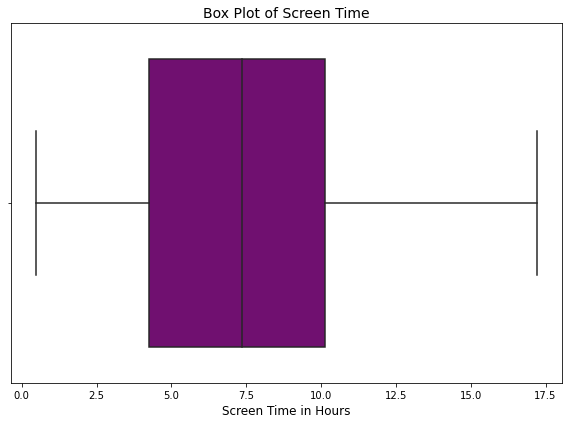

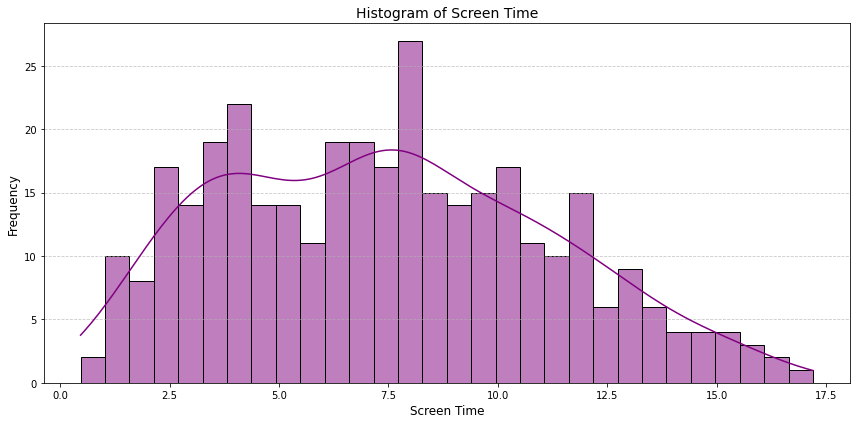

In [7]:
# Calculate box plot values
Q1 = data['Screen_time'].quantile(0.25)  # 25th percentile
Q3 = data['Screen_time'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile Range
median = data['Screen_time'].median()  # Median
minimum = data['Screen_time'].min()  # Minimum
maximum = data['Screen_time'].max()  # Maximum

# Print box plot statistics
print("Box Plot Values:")
print(f"Minimum: {minimum}")
print(f"Q1 (25th Percentile): {Q1}")
print(f"Median: {median}")
print(f"Q3 (75th Percentile): {Q3}")
print(f"Maximum: {maximum}")

# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Screen_time', color='Purple')
plt.title("Box Plot of Screen Time", fontsize=14)
plt.xlabel("Screen Time in Hours", fontsize=12)
plt.tight_layout()
plt.show()

# Distribution Histogram with KDE
plt.figure(figsize=(12, 6))
sns.histplot(data['Screen_time'], bins=30, kde=True, color='purple')
plt.title("Histogram of Screen Time", fontsize=14)
plt.xlabel("Screen Time", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


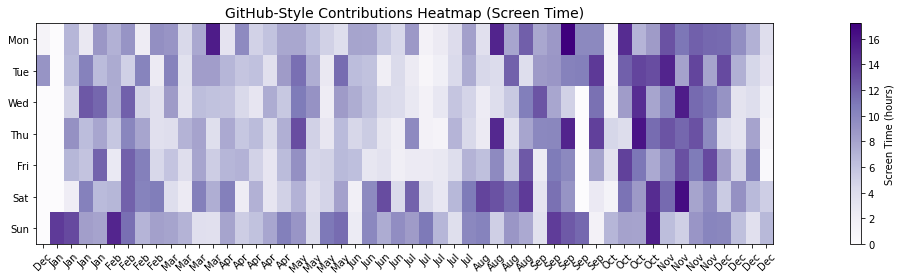

In [8]:
df = data
# Extract the weekday and week number
df["Weekday"] = df["Date"].dt.weekday  # Monday=0, Sunday=6

df["Week_Number"] = df["Date"].dt.isocalendar().week
df["Month"] = df["Date"].dt.strftime('%b')  # Abbreviated month names

week_to_month = (
    df.groupby("Week_Number")
    .apply(lambda x: x["Month"].iloc[0])  # Get the first month's name for each week
    .reindex(range(1, 53), fill_value="")  # Ensure all weeks are included (1 to 52)
)


# Pivot data into a matrix for the heatmap (e.g., sum of Screen_time for each day)
heatmap_data = pd.pivot_table(df, values="Screen_time", index="Weekday", columns="Week_Number", aggfunc=np.sum, fill_value=0)

# Filter week_to_month to match the weeks in heatmap_data.columns
mapped_labels = [week_to_month.get(week, "") for week in heatmap_data.columns]

# Plot the heatmap
fig, ax = plt.subplots(figsize=(14, 4))
cmap = plt.cm.Purples  
heatmap = ax.imshow(heatmap_data, aspect='auto', cmap=cmap, interpolation='nearest')

# Set axis labels and ticks
ax.set_yticks(range(7))
ax.set_yticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
ax.set_xticks(range(heatmap_data.shape[1]))
ax.set_xticklabels(mapped_labels, rotation=45)
# ax.set_xticklabels([f"Week {w}" for w in heatmap_data.columns], rotation=45)

# Add a color bar
cbar = plt.colorbar(heatmap, orientation='vertical', pad=0.08)
cbar.set_label('Screen Time (hours)', fontsize=10)

# Title
plt.title("GitHub-Style Contributions Heatmap (Screen Time)", fontsize=14)

# Show plot
plt.tight_layout()
plt.show()

## Steps Data Analysis

Box Plot Values:
Minimum: 0.0
Q1 (25th Percentile): 1638.0
Median: 5055.0
Q3 (75th Percentile): 8764.0
Maximum: 21759.0


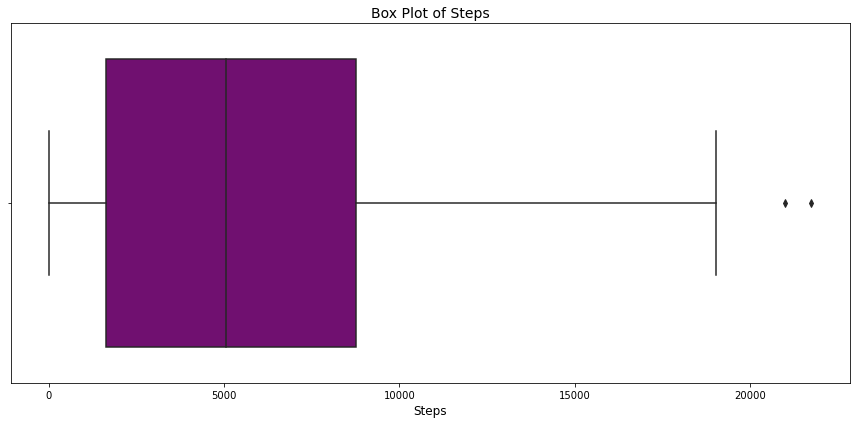

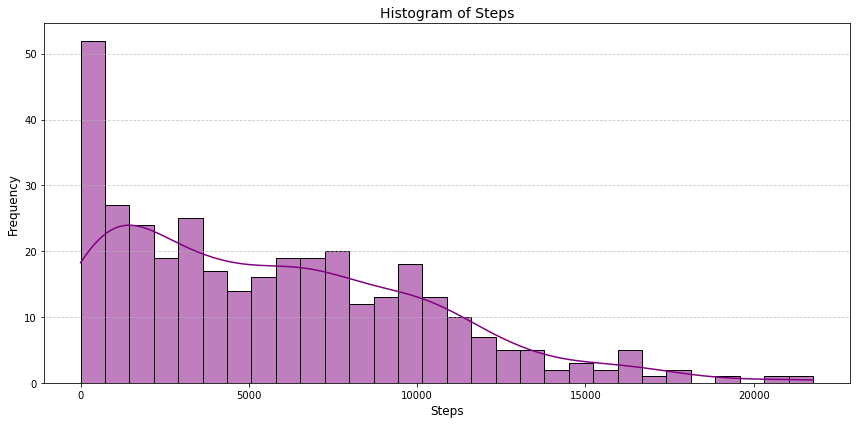

In [9]:
# Ensure 'Steps' is numerical
data['Steps'] = pd.to_numeric(data['Steps'], errors='coerce')

# Calculate box plot values
Q1 = data['Steps'].quantile(0.25)  # 25th percentile
Q3 = data['Steps'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile Range
median = data['Steps'].median()  # Median
minimum = data['Steps'].min()  # Minimum
maximum = data['Steps'].max()  # Maximum


# Print box plot statistics
print("Box Plot Values:")
print(f"Minimum: {minimum}")
print(f"Q1 (25th Percentile): {Q1}")
print(f"Median: {median}")
print(f"Q3 (75th Percentile): {Q3}")
print(f"Maximum: {maximum}")

# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Steps', color='purple')
plt.title("Box Plot of Steps", fontsize=14)
plt.xlabel("Steps", fontsize=12)
plt.tight_layout()
plt.show()

# Distribution Histogram with KDE
plt.figure(figsize=(12, 6))
sns.histplot(data['Steps'], bins=30, kde=True, color='purple')
plt.title("Histogram of Steps", fontsize=14)
plt.xlabel("Steps", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


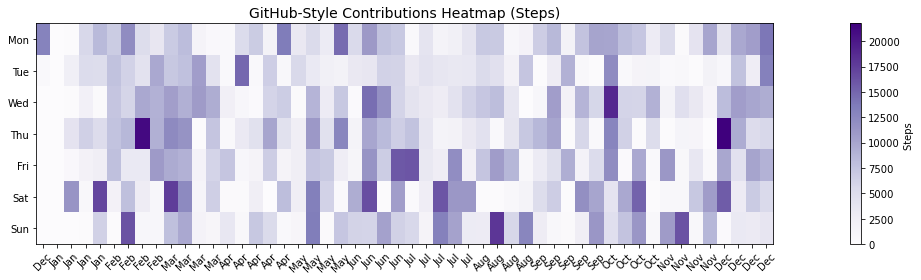

In [10]:
# Pivot data into a matrix for the heatmap (e.g., sum of Screen_time for each day)
heatmap_data = pd.pivot_table(df, values="Steps", index="Weekday", columns="Week_Number", aggfunc=np.sum, fill_value=0)

# Filter week_to_month to match the weeks in heatmap_data.columns
mapped_labels = [week_to_month.get(week, "") for week in heatmap_data.columns]

# Plot the heatmap
fig, ax = plt.subplots(figsize=(14, 4))
cmap = plt.cm.Purples  
heatmap = ax.imshow(heatmap_data, aspect='auto', cmap=cmap, interpolation='nearest')

# Set axis labels and ticks
ax.set_yticks(range(7))
ax.set_yticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
ax.set_xticks(range(heatmap_data.shape[1]))
ax.set_xticklabels(mapped_labels, rotation=45)
# ax.set_xticklabels([f"Week {w}" for w in heatmap_data.columns], rotation=45)

# Add a color bar
cbar = plt.colorbar(heatmap, orientation='vertical', pad=0.08)
cbar.set_label('Steps ', fontsize=10)

# Title
plt.title("GitHub-Style Contributions Heatmap (Steps)", fontsize=14)

# Show plot
plt.tight_layout()
plt.show()

## Monthly Data Analysis for Steps and Screen Time

In [11]:
# Extract month from Date to group by month
data['Month'] = data['Date'].dt.to_period('M')
data['Week'] = data['Date'].dt.to_period('W')

# Calculate monthly averages for Screen_time and Steps
monthly_averages = data.groupby('Month').agg({
    'Screen_time': 'mean',
    'Steps': 'mean'
}).reset_index()

# Find the month with the highest and lowest screen time
highest_screen_time_month = monthly_averages.loc[monthly_averages['Screen_time'].idxmax()]
lowest_screen_time_month = monthly_averages.loc[monthly_averages['Screen_time'].idxmin()]

# Find the month with the highest and lowest steps
highest_steps_month = monthly_averages.loc[monthly_averages['Steps'].idxmax()]
lowest_steps_month = monthly_averages.loc[monthly_averages['Steps'].idxmin()]

# Print results
print("Month with the Highest Screen Time:")
print(highest_screen_time_month)
print("\nMonth with the Lowest Screen Time:")
print(lowest_screen_time_month)
print("\nMonth with the Highest Steps:")
print(highest_steps_month)
print("\nMonth with the Lowest Steps:")
print(lowest_steps_month)


Month with the Highest Screen Time:
Month              2024-11
Screen_time      11.291667
Steps          3353.366667
Name: 10, dtype: object

Month with the Lowest Screen Time:
Month              2024-07
Screen_time       4.695699
Steps          5178.967742
Name: 6, dtype: object

Month with the Highest Steps:
Month              2024-12
Screen_time       6.176344
Steps          7722.645161
Name: 11, dtype: object

Month with the Lowest Steps:
Month              2024-01
Screen_time       8.192593
Steps          3023.388889
Name: 0, dtype: object


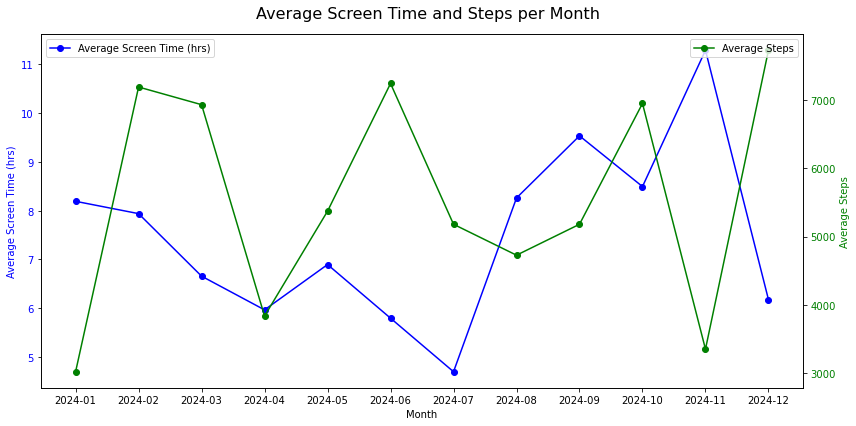

In [12]:
# Calculate monthly averages for Screen_time and Steps
monthly_averages = data.groupby('Month').agg({
    'Screen_time': 'mean',
    'Steps': 'mean'
}).reset_index()

# Plotting the average screen time and steps per month
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Average Screen Time
ax1.plot(monthly_averages['Month'].astype(str), monthly_averages['Screen_time'], color='blue', marker='o', label='Average Screen Time (hrs)')
ax1.set_xlabel('Month')
ax1.set_ylabel('Average Screen Time (hrs)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for steps
ax2 = ax1.twinx()
ax2.plot(monthly_averages['Month'].astype(str), monthly_averages['Steps'], color='green', marker='o', label='Average Steps')
ax2.set_ylabel('Average Steps', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Title and Legend
fig.suptitle('Average Screen Time and Steps per Month', fontsize=16)
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


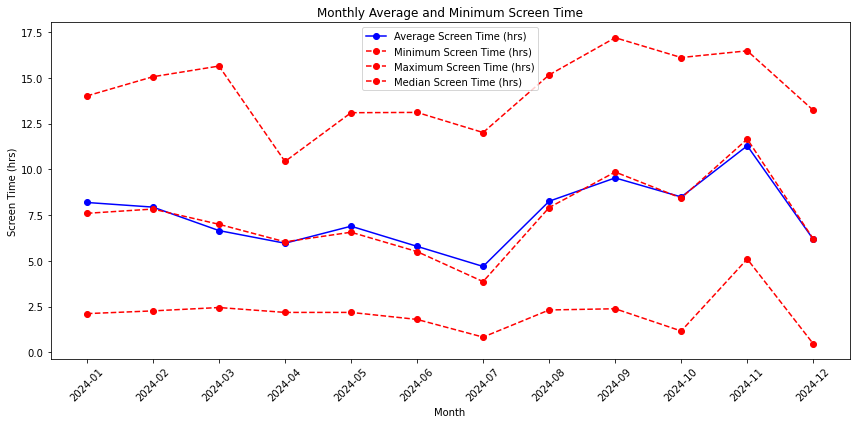

In [13]:
# Calculate monthly mins for Screen_time and Steps
monthly_mins = data.groupby('Month').agg({
    'Screen_time': 'min',
    'Steps': 'min'
}).reset_index()

monthly_maxs = data.groupby('Month').agg({
    'Screen_time': 'max',
    'Steps': 'max'
}).reset_index()

monthly_medians = data.groupby('Month').agg({
    'Screen_time': 'median',
    'Steps': 'median'
}).reset_index()

# Plot 1: Screen Time (Average and Minimum)
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(monthly_averages['Month'].astype(str), monthly_averages['Screen_time'], 
         color='blue', marker='o', label='Average Screen Time (hrs)')
ax1.plot(monthly_mins['Month'].astype(str), monthly_mins['Screen_time'], 
         color='red', marker='o', linestyle='--', label='Minimum Screen Time (hrs)')
ax1.plot(monthly_maxs['Month'].astype(str), monthly_maxs['Screen_time'], 
         color='red', marker='o', linestyle='--', label='Maximum Screen Time (hrs)')
ax1.plot(monthly_medians['Month'].astype(str), monthly_medians['Screen_time'], 
         color='red', marker='o', linestyle='--', label='Median Screen Time (hrs)')
ax1.set_xlabel('Month')
ax1.set_ylabel('Screen Time (hrs)')
ax1.set_title('Monthly Average and Minimum Screen Time')
ax1.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
monthly_averages

,Month,Screen_time,Steps
0,2024-01,8.192593,3023.388889
1,2024-02,7.939655,7185.448276
2,2024-03,6.656452,6927.258065
3,2024-04,5.965000,3837.133333
4,2024-05,6.895161,5370.483871
5,2024-06,5.794444,7236.933333
6,2024-07,4.695699,5178.967742
7,2024-08,8.261290,4727.032258
8,2024-09,9.535897,5178.933333
9,2024-10,8.495161,6945.032258


## Sentiment Data Analysis

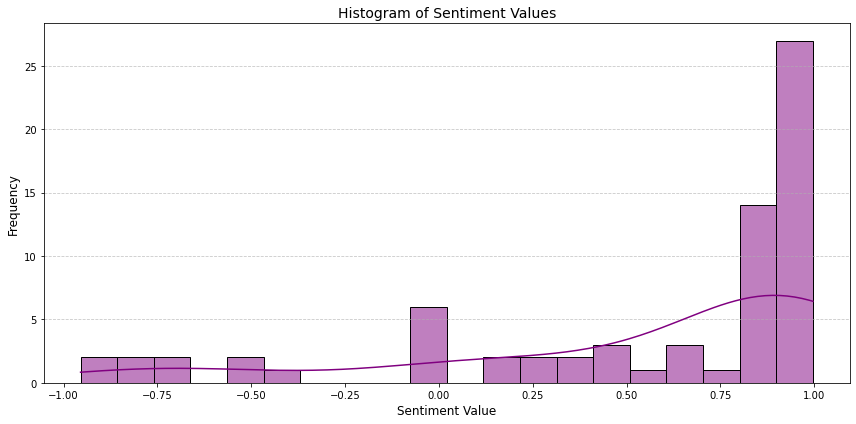

In [15]:
# Ensure that 'Sentiment Value' is numerical if not already
sentiments['Sentiment Score'] = pd.to_numeric(sentiments['Sentiment Score'], errors='coerce')

# Plot histogram for Sentiment Value
plt.figure(figsize=(12, 6))
sns.histplot(sentiments['Sentiment Score'], bins=20, kde=True, color='Purple')
plt.title("Histogram of Sentiment Values", fontsize=14)
plt.xlabel("Sentiment Value", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




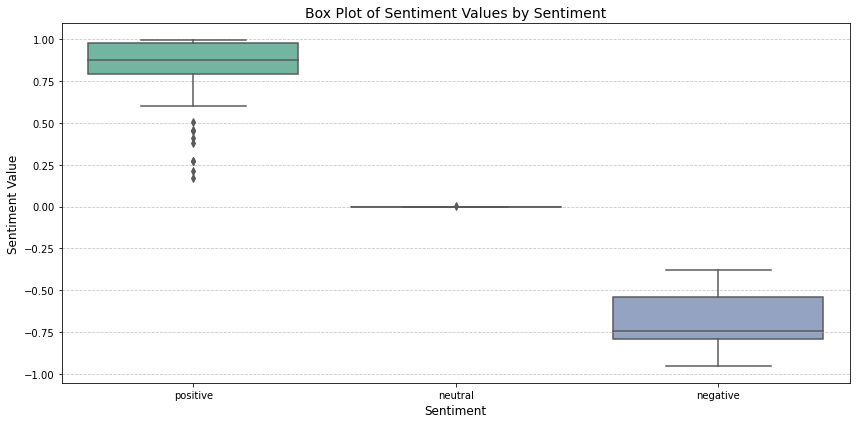

In [16]:
# Plot box plot for Sentiment Value grouped by Sentiment
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sentiment', y='Sentiment Score', data=sentiments, palette='Set2')
plt.title("Box Plot of Sentiment Values by Sentiment", fontsize=14)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Sentiment Value", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [17]:
sentiments.columns

Index(['Date', 'Sentiment Score', 'Sentiment'], dtype='object')

# Merging the Data Sets

## Preparing Data for Merging

In [18]:
# sentiments table before preprocessing
sentiments

,Date,Sentiment Score,Sentiment
0,"Nov 28, 2024",0.4497,positive
1,"Nov 30, 2024",0.8126,positive
2,"Dec 1, 2024",0.0000,neutral
3,"Dec 2, 2024",0.2732,positive
4,"Dec 3, 2024",0.5994,positive
...,...,...,...
65,"Jan 26, 2024",0.9871,positive
66,"Jan 17, 2024",0.8338,positive
67,"Jan 11, 2024",0.0000,neutral
68,"Jan 9, 2024",0.6893,positive


In [19]:
# Convert 'Date' column to datetime
sentiments['Date'] = pd.to_datetime(sentiments['Date'])

# Sort the DataFrame by the 'Date' column
sentiments = sentiments.sort_values(by='Date')

# Create a date range from January 01, 2024, to December 31, 2024
date_range = pd.date_range(start="2024-01-01", end="2024-12-31")

# Set 'Date' as index
sentiments.set_index('Date', inplace=True)

# Reindex to include all dates in the date range, filling missing values with NaN
sentiments = sentiments.reindex(date_range, fill_value=np.nan)

# Reset the index and rename the column to 'Date'
sentiments.reset_index(inplace=True)
sentiments.rename(columns={"index": "Date"}, inplace=True)

In [20]:
# Sentiments Data after preprocessing
sentiments.head(30)

,Date,Sentiment Score,Sentiment
0,2024-01-01,NaN,NaN
1,2024-01-02,NaN,NaN
2,2024-01-03,-0.5393,negative
3,2024-01-04,NaN,NaN
4,2024-01-05,NaN,NaN
5,2024-01-06,NaN,NaN
6,2024-01-07,NaN,NaN
7,2024-01-08,NaN,NaN
8,2024-01-09,0.6893,positive
9,2024-01-10,NaN,NaN


In [21]:
sentiments

,Date,Sentiment Score,Sentiment
0,2024-01-01,NaN,NaN
1,2024-01-02,NaN,NaN
2,2024-01-03,-0.5393,negative
3,2024-01-04,NaN,NaN
4,2024-01-05,NaN,NaN
...,...,...,...
361,2024-12-27,NaN,NaN
362,2024-12-28,NaN,NaN
363,2024-12-29,NaN,NaN
364,2024-12-30,NaN,NaN


In [22]:
data = data.drop(columns=['Weekday', 'Week_Number', 'Month', 'Week'])
data

,Date,Screen_time,Steps
0,2024-01-14,14.016667,43.0
1,2024-01-15,6.916667,108.0
2,2024-01-16,6.600000,2345.0
3,2024-01-17,4.966667,207.0
4,2024-01-18,9.233333,4030.0
...,...,...,...
348,2024-12-27,0.466667,8975.0
349,2024-12-28,5.133333,5435.0
350,2024-12-29,6.666667,3758.0
351,2024-12-30,1.200000,13002.0


In [23]:
# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Sort the DataFrame by the 'Date' column
data = data.sort_values(by='Date')

# Set 'Date' as index
data.set_index('Date', inplace=True)

# Reindex to include all dates in the date range, filling missing values with NaN
data = data.reindex(date_range, fill_value=np.nan)

# Reset the index and rename the column to 'Date'
data.reset_index(inplace=True)
data.rename(columns={"index": "Date"}, inplace=True)



In [24]:

data.head(30)

,Date,Screen_time,Steps
0,2024-01-01,NaN,NaN
1,2024-01-02,NaN,NaN
2,2024-01-03,NaN,NaN
3,2024-01-04,NaN,NaN
4,2024-01-05,NaN,NaN
5,2024-01-06,NaN,NaN
6,2024-01-07,NaN,NaN
7,2024-01-08,NaN,NaN
8,2024-01-09,NaN,NaN
9,2024-01-10,NaN,NaN


## The Merge

In [25]:
# Sort the indices for consistency
sentiments.sort_index(inplace=True)
data.sort_index(inplace=True)

# Merge the DataFrames on the index
merged_df = pd.merge(data, sentiments, on='Date')



In [26]:
# Display the merged DataFrame
merged_df.head(30)

,Date,Screen_time,Steps,Sentiment Score,Sentiment
0,2024-01-01,NaN,NaN,NaN,NaN
1,2024-01-02,NaN,NaN,NaN,NaN
2,2024-01-03,NaN,NaN,-0.5393,negative
3,2024-01-04,NaN,NaN,NaN,NaN
4,2024-01-05,NaN,NaN,NaN,NaN
5,2024-01-06,NaN,NaN,NaN,NaN
6,2024-01-07,NaN,NaN,NaN,NaN
7,2024-01-08,NaN,NaN,NaN,NaN
8,2024-01-09,NaN,NaN,0.6893,positive
9,2024-01-10,NaN,NaN,NaN,NaN


C:\Users\bwire\AppData\Local\Temp\ipykernel_24616\1901599668.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_df.corr()


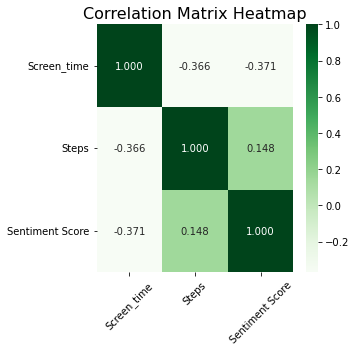

In [27]:
# Compute the correlation matrix
correlation_matrix = merged_df.corr()

# Create a heatmap
plt.figure(figsize=(5, 5))  # Adjust the figure size
sns.heatmap(correlation_matrix, annot=True, cmap="Greens", fmt=".3f", cbar=True)

# Add titles
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.yticks(rotation=0)   # Keep y-axis labels horizontal

# Show the plot
plt.tight_layout()
plt.show()


In [28]:
sentiments.index

RangeIndex(start=0, stop=366, step=1)

# Goals Met

For 2024, my goal was to meet 10,000 steps daily and a screen time of under 3 hours so I want to know the number instances when the goals were met.

In [29]:
# Calculate the percentage of times steps >= 10000
percentage_steps_10000 = (merged_df['Steps'] >= 10000).mean() * 100
number_steps_10000 = (merged_df['Steps'] >= 10000).sum() 

# Display the result
print("Goal was 10,000 steps per day")
print(f"Percentage of times steps >= 10,000: {percentage_steps_10000:.2f}%")
print(f"Number of times steps >= 10,000: {number_steps_10000}")

Goal was 10,000 steps per day
Percentage of times steps >= 10,000: 17.49%
Number of times steps >= 10,000: 64


In [30]:
# Calculate the percentage of times screentime <= 3 hours
percentage_screen_time_3 = (merged_df['Screen_time'] <=3).mean() * 100
number_screen_time_3 = (merged_df['Screen_time'] <= 3).sum() 

# Display the result
print ("Goal was screen time <= 3")
print(f"Percentage of screen time <= 3: {percentage_screen_time_3:.2f}%")
print(f"Number of screen time <= 3: {number_screen_time_3}")

Goal was screen time <= 3
Percentage of screen time <= 3: 12.57%
Number of screen time <= 3: 46


In [31]:
# Select rows with no null values in all columns
non_null_rows = merged_df.dropna()


In [32]:
non_null_rows

,Date,Screen_time,Steps,Sentiment Score,Sentiment
16,2024-01-17,4.966667,207.0,0.8338,positive
25,2024-01-26,5.933333,1858.0,0.9871,positive
29,2024-01-30,6.516667,4950.0,0.8623,positive
31,2024-02-01,7.833333,5074.0,0.9794,positive
36,2024-02-06,7.566667,7658.0,0.8126,positive
...,...,...,...,...,...
346,2024-12-12,3.100000,9496.0,0.9516,positive
347,2024-12-13,4.683333,4386.0,0.8768,positive
348,2024-12-14,9.216667,2932.0,-0.5267,negative
349,2024-12-15,6.200000,3270.0,-0.6655,negative


# Data Modelling

Data Modelling was done to predict sentiment score based on screen_time and steps. Five regression models were tested; linear regression, decision tree regression, random forest regression, SVR regression, Gradient Boosting Regression.
    

In [33]:
# Define features and target for regression
X_reg = non_null_rows[['Screen_time', 'Steps']].values
y_reg = non_null_rows['Sentiment Score'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Train a Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict and evaluate
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)


# Calculate R² Score
r2_score = regressor.score(X_test, y_test)

print(f"Regression Mean Squared Error: {mse}")
print(f"Regression R² Score: {r2_score}")


Regression Mean Squared Error: 0.11579866743156829
Regression R² Score: -1.1268783161980047


In [34]:
type(r2_score)

numpy.float64

In [35]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train Decision Tree Regressor
tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train, y_train)

# Predict and evaluate
y_pred_tree = tree_regressor.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f"Decision Tree Regression MSE: {mse_tree}")
print(f"Decision Tree Regression R² Score: {r2_tree}")


Decision Tree Regression MSE: 0.15068053615384616
Decision Tree Regression R² Score: -1.767554861614392


In [36]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_regressor.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regression MSE: {mse_rf}")
print(f"Random Forest Regression R² Score: {r2_rf}")


Random Forest Regression MSE: 0.19668838348261544
Random Forest Regression R² Score: -2.6125826588153775


In [37]:
from sklearn.svm import SVR

# Train Support Vector Regressor
svr = SVR(kernel='rbf')  # Use radial basis function kernel for non-linear relationships
svr.fit(X_train, y_train)

# Predict and evaluate
y_pred_svr = svr.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"SVR Regression MSE: {mse_svr}")
print(f"SVR Regression R² Score: {r2_svr}")


SVR Regression MSE: 0.053396777738601006
SVR Regression R² Score: 0.01925945050975153


In [38]:
from sklearn.ensemble import GradientBoostingRegressor

# Train Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(random_state=42)
gb_regressor.fit(X_train, y_train)

# Predict and evaluate
y_pred_gb = gb_regressor.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting Regression MSE: {mse_gb}")
print(f"Gradient Boosting Regression R² Score: {r2_gb}")


Gradient Boosting Regression MSE: 0.5333967831693952
Gradient Boosting Regression R² Score: -8.796918023458046


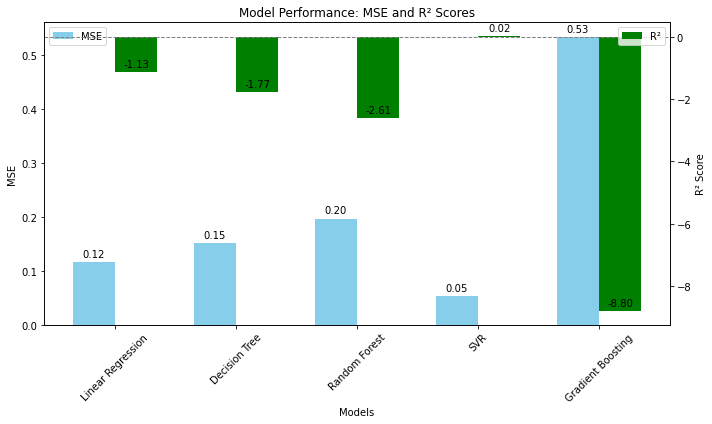

In [39]:
# Dummy results for MSE and R² scores
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVR', 'Gradient Boosting']
mse_scores = [mse, mse_tree, mse_rf, mse_svr, mse_gb]  
r2_scores = [-1.1268, r2_tree, r2_rf, r2_svr, r2_gb]



# Plot the results
x = np.arange(len(models))
width = 0.35  # Width of the bars

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot MSE
bar1 = ax1.bar(x - width/2, mse_scores, width, label='MSE', color='skyblue')
ax1.set_ylabel('MSE')
ax1.set_xlabel('Models')
ax1.set_title('Model Performance: MSE and R² Scores')
ax1.set_xticks(x)
ax1.set_xticklabels(models, rotation=45)
ax1.legend(loc='upper left')

# Create a secondary y-axis for R² scores
ax2 = ax1.twinx()
bar2 = ax2.bar(x + width/2, r2_scores, width, label='R²', color='green')
ax2.set_ylabel('R² Score')
ax2.axhline(y=0, color='gray', linestyle='--', linewidth=1)
ax2.legend(loc='upper right')

# Add values on top of bars
for bar in bar1:
    height = bar.get_height()
    ax1.annotate(f'{height:.2f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # Offset text
                 textcoords="offset points",
                 ha='center', va='bottom')

for bar in bar2:
    height = bar.get_height()
    ax2.annotate(f'{height:.2f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # Offset text
                 textcoords="offset points",
                 ha='center', va='bottom')

fig.tight_layout()
plt.show()


Here’s the interpretation of the given results for the five regression models:

### **Mean Squared Error (MSE)**
- **Lower MSE** indicates better performance since it measures the average squared difference between predicted and actual values. The closer to 0, the better the model.

### **R² Score**
- **R² measures the proportion of variance in the dependent variable that the model explains.**
  - R² closer to **1** indicates a good fit.
  - Negative R² implies the model performs **worse than a simple mean prediction**.

---

### **Model Performance Breakdown**
1. **Linear Regression**
   - **MSE**: 0.1158
   - **R²**: -1.1268
   - **Meaning**: The linear regression model fits poorly and performs worse than predicting the mean sentiment score.

2. **Decision Tree Regression**
   - **MSE**: 0.1507
   - **R²**: -1.7676
   - **Meaning**: Decision trees also perform poorly. Their overfitting tendencies might not work well with this small dataset.

3. **Random Forest Regression**
   - **MSE**: 0.1967
   - **R²**: -2.6126
   - **Meaning**: Random forests, though robust, fail to generalize well here. Likely due to the small dataset size and overfitting.

4. **Support Vector Regression (SVR)**
   - **MSE**: 0.0534
   - **R²**: 0.0193
   - **Meaning**: SVR performs the best, with the lowest MSE and a positive R² score. However, the R² score being close to 0 indicates it explains very little variance in the target.

5. **Gradient Boosting Regression**
   - **MSE**: 0.5334
   - **R²**: -8.7969
   - **Meaning**: Gradient Boosting performs the worst among all models, suggesting it struggles to fit this dataset due to high variance or noise.

---

### **Conclusion**
- **Best Model**: **SVR Regression** with the lowest MSE (0.0534) and a marginally positive R² score (0.0193).
- **Poor Performers**: Gradient Boosting and Random Forest likely overfit the small dataset.
- **Overall Insight**: These results suggest the dataset is small, potentially noisy, and might require feature engineering, more data, or simpler models to perform better.